# Zadanie 12


## Przygotowywania do zadania 

### Wczytywanie potrzebnych bibliotek

In [3]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np


### Ustawianie globalnych danych

Ustawiam tutaj, dane które są uniwersalne dla każdego testu, to znaczy:

1. Liczba stopni swobody
2. Liczba danych
3. Liczba symulacji, które wykonam
4. Poziom istnotności


In [4]:
np.random.seed(seed=311)

# Liczba danych dla jakich wykonam symulacje
liczby_danych = [10,20,50,100,200]  # Zakres od 1-50 co 1
# Ustalam poziom istotności
poziom_istotnosci = 0.05
# Liczba odchylen standardowych 
liczba_ex = range(1,50,1)
# Liczba symulacji na jakich będę bazować
liczba_symulacji = 5000
# Czcionka dla tytulu
font_title = {'family' :'serif','size':17}

## Badanie 

### Potrzebne funkcje 

Tutaj stworzę wszystkie funkcje, które wykorzystam do badania, przy okazji opisując od razu ich działanie. Następnie przy symulacji badania, będą one tylko wywoływane. Funkcje zaczynają się od najbardziej ogólnej i idą w dół razem z programem(idziemy po kolei tak samo jak program).

#### Funkcja obliczania mocy testu 

Najogólniejsza funkcja, która przygotuje dane, które wykorzystam, aby zrobić symulacje w funkcji symulacja. Więc ustalamy liczbę danych oraz wartosc oczekwiana i idziemy dalej przekazując parametry dalej do funkcji. Po symulacji dodajemy wynik do tablicy i idziemy dalej.

Funkcja będzie zwracać tablice 2D(i,j), która zbierała dane dla i-tej liczbie danych oraz j-tych stopni swobody oraz tablice wylosowanych stopni swobody podczas symulacjii.



In [5]:
def obliczanie_mocy_testu():
    # Tablica, która zbierze mi moce testów, które zwróci
    moce_testow = []

    # Będzie 5 roznych losowan stopni swobody
    for l_danych in liczby_danych:
        # Rozpoczecie symulacji 
        moce_testow.append([symulacja(l_danych,l_ex) for l_ex in liczba_ex])

    # Zwracam w.w tablice
    return moce_testow

#### Funkcja symulacji 

Ustaliliśmy już liczbę danych oraz wartość odchylenia standardowego dla naszych danych. 
W tej funkcji będziemy generować dane z rozkładu normalnego dokładnie z tymi parametrami, przekazanymi jako argumenty. 
Następnie prześlemy je do funkcji, która wybierze, który test jest obecnie symulowany i wynik tej funkcji będziemy sumować w zmiennej 
suma_odrzucen_H0.

Argumenty:
- l_danych - Ile danych będziemy losować z rozkładu chi2
- l_ex - Jaka jest wartosc wartość oczekiwana


Funkcja będzie zwracać odsetek w jakim odrzuciłem hipotezę zerową dla podanych parametrów

In [6]:
def symulacja(l_danych,l_ex):
    # W tej zmiennej będę sumował ile razy odrzuciłem hipotezę zerową dla danego zestawu 
    suma_odrzucenia_H0 = 0

    # Tutaj będzie symulacja
    for k in range(liczba_symulacji):
        # Losuje probke z rozkladu normalnego 
        probka = stats.norm.rvs(size=l_danych,loc = l_ex)

        # Obliczam wartosc odchylenia standardowego
        wartosc_std = np.std(probka)
        
        # Tworze 2 probke z  rozkładu normalnego o podanej wczesniej l_std i obliczonej wartosci oczekiwanej
        probka2 = stats.norm.rvs(size=l_danych,scale=wartosc_std,loc=l_ex)

        # Następnie przekazuje wszystkie dane, aby wybrac który test jest symulowany i dowiedzieć się jaki jest wynik testu
        suma_odrzucenia_H0 += wybor_testu(probka, probka2)

    # Zwracam odsetek odrzucenia hipotezy zerowej
    return suma_odrzucenia_H0/liczba_symulacji

#### Funkcja wyboru testu 

Funkcja za argumenty przyjmuje wszystkie dane, które są jej potrzebne do wybrania oraz przeprowadzenia danego testu. 
Argumenty, to:
- probka1 - Zestaw danych wybrany we wczesniejszej funckji 
- probka2 - Zestaw danych wybrany we wczesniejszej funckji 

Funkcja będzie zwracać 1 lub 0 w zależności od wyniku testu(1-odrzucamy test, 0-nie ma podstaw)

In [7]:
def wybor_testu(probka1,probka2):

    """
    Ogólna zasada działania testów:

    Jeżeli pvalue z danego testu jest mniejsze niż wczesniej ustalony poziom istotnotnosci to odrucamy 
    Hipoteze zerowa co znaczy ze zwracamy wartość 1. W przeciwnym wypadku zwracamy 0
    
    """
    
    # Test Kolgomorova
    if stats.kstest(probka1,probka2).pvalue < poziom_istotnosci: return 1
    
    # Jeżeli do tej pory nie zwrócono 1 to znaczy, że żaden z testów nie odrzucił H0 więc możemy zwrócic 0
    return 0
            


## Symulacja

In [8]:
moc_kol = obliczanie_mocy_testu()

## Wnioski 

### Test Kołgomorowa

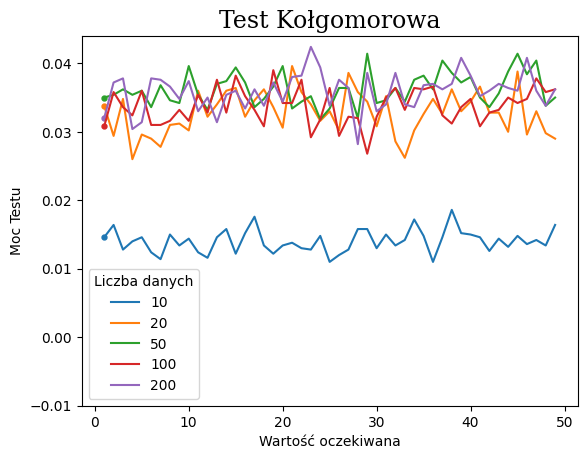

In [9]:
# Tworzę wykres
wykres_kolgo = plt.figure()

# Dodaje dane do wykres
for i,moc in enumerate(moc_kol):
    plt.plot(liczba_ex,moc,label= str(liczby_danych[i]))
    plt.scatter(liczba_ex[0], moc[0], s=50, marker='.') 



# Dodaje opisy do wykresu 
plt.xlabel("Wartość oczekiwana")
plt.ylabel("Moc Testu")
plt.title("Test Kołgomorowa",fontdict=font_title)
plt.legend(title="Liczba danych")
plt.ylim(-0.01)
plt.show()

### Wnioski

Jak możemy zobaczyć na wykresie zmiana wartości oczekiwanej nie wpływa na moc testu, co ciekawe zaobserwowania to to, że test Kołmogorowa jest na tyle dokładny, że krąży wokoło wartości poziomu istotnosci(0.05), a w tym przypadku spadl z dokladnoscia o okolo 0.02, co moze sugerowac, ze ustalenie takich samych odchylen standardowych wplynelo na moc testu negatywnie. 